<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/random_forest/03_stock_prediction_brak_filmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

In [345]:
print("#############################################")
print("Etap9. Odcinek brak")

import pandas_datareader

#############################################
Etap9. Odcinek brak


In [346]:
data = pandas_datareader.stooq.StooqDailyReader('AMZN').read()

In [347]:
df = data.copy()

In [348]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-05,3166.01,3223.3800,3165.060,3218.51,2655548
2021-01-04,3270.00,3272.0000,3144.020,3186.63,4411449
2020-12-31,3275.00,3282.9219,3241.200,3256.93,2957206
2020-12-30,3341.00,3342.1000,3282.470,3285.85,3209310
2020-12-29,3309.94,3350.6500,3281.223,3322.00,4872933


In [349]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-14,580.25,602.25,569.880,593.00,6069839
2016-01-13,620.88,620.88,579.160,581.81,5996350
2016-01-12,625.25,625.99,612.242,617.89,4094644
2016-01-11,612.48,619.85,598.570,617.74,4891551
2016-01-08,619.66,624.14,606.000,607.05,5238293


In [350]:
df.index

DatetimeIndex(['2021-01-05', '2021-01-04', '2020-12-31', '2020-12-30',
               '2020-12-29', '2020-12-28', '2020-12-24', '2020-12-23',
               '2020-12-22', '2020-12-21',
               ...
               '2016-01-22', '2016-01-21', '2016-01-20', '2016-01-19',
               '2016-01-15', '2016-01-14', '2016-01-13', '2016-01-12',
               '2016-01-11', '2016-01-08'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [351]:
df.describe().apply(lambda x: round(x, 2))

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,1563.18,1579.47,1544.48,1562.76,4297747.27
std,748.35,758.52,736.13,747.35,2151940.46
min,478.01,493.50,474.00,482.07,881337.00
25%,899.63,903.65,890.28,898.28,2849491.00
50%,1613.92,1626.00,1595.15,1610.15,3717544.00
75%,1885.89,1902.50,1866.02,1886.03,5185539.00
max,3547.00,3552.25,3486.68,3531.45,16552598.00


In [352]:
df = df.dropna()
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [353]:
df = df.sort_index()

In [354]:
df.index

DatetimeIndex(['2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-04', '2021-01-05'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [355]:
# ten wiersz df = df.reset_index() był ujęty w komentarz, ale wtedy był błąd
# bo nie było kolumny df["Date"] więc nie mógł działały linijki z tworzeniem
# df_train i df_test 
# Po zresetowaniu indeksu nie będzie nim już cecha "Date" ale liczby 0,1,...,1256
df = df.reset_index()
print(df)
print(df.index)
df_train = df[df['Date'] < '2018-01-01']
df_test = df[df['Date'] > '2018-01-01']

           Date     Open       High       Low    Close   Volume
0    2016-01-08   619.66   624.1400   606.000   607.05  5238293
1    2016-01-11   612.48   619.8500   598.570   617.74  4891551
2    2016-01-12   625.25   625.9900   612.242   617.89  4094644
3    2016-01-13   620.88   620.8800   579.160   581.81  5996350
4    2016-01-14   580.25   602.2500   569.880   593.00  6069839
...         ...      ...        ...       ...      ...      ...
1252 2020-12-29  3309.94  3350.6500  3281.223  3322.00  4872933
1253 2020-12-30  3341.00  3342.1000  3282.470  3285.85  3209310
1254 2020-12-31  3275.00  3282.9219  3241.200  3256.93  2957206
1255 2021-01-04  3270.00  3272.0000  3144.020  3186.63  4411449
1256 2021-01-05  3166.01  3223.3800  3165.060  3218.51  2655548

[1257 rows x 6 columns]
RangeIndex(start=0, stop=1257, step=1)


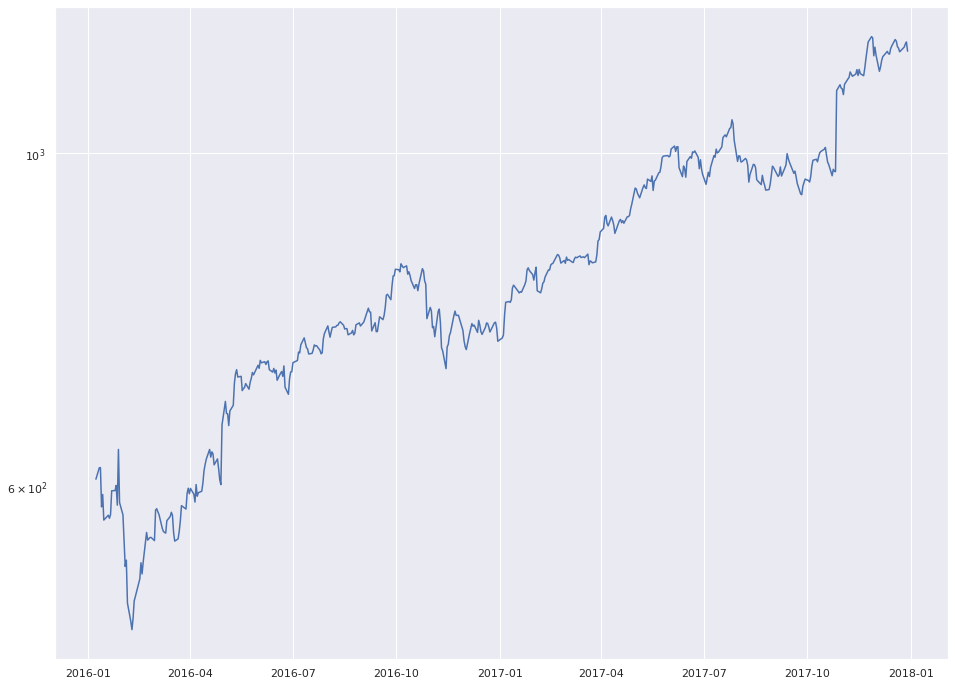

In [356]:
close = df_train['Close']
volume = df['Volume']

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# sam powiększyłem rozmiar wykresu
plt.figure(figsize=(16,12))
plt.plot(df_train['Date'], close)
plt.yscale('log')

In [357]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=30, min_samples_leaf=30)
# zamienia kolumnę Date na tablicę z numpy, a potem zmienia jej kształt
# żeby miała jedną kolumnę. W dokumentacji radzą to_numpy() zamiast values
forest.fit(df_train['Date'].values.reshape(-1, 1), close)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [358]:
# sam sprawdzam predykcję na zbiorze testowym
forest.predict(df_test['Date'].values.reshape(-1, 1))[:10]

array([1135.53362441, 1135.53362441, 1135.53362441, 1135.53362441,
       1135.53362441, 1135.53362441, 1135.53362441, 1135.53362441,
       1135.53362441, 1135.53362441])

In [359]:
# sam sprawdzam predykcję na zbiorze treningowym
forest.predict(df_train['Date'].values.reshape(-1, 1))[:10]

array([583.49009527, 583.49009527, 583.49009527, 583.49009527,
       583.49009527, 583.49009527, 583.49009527, 583.49009527,
       583.49009527, 583.49009527])

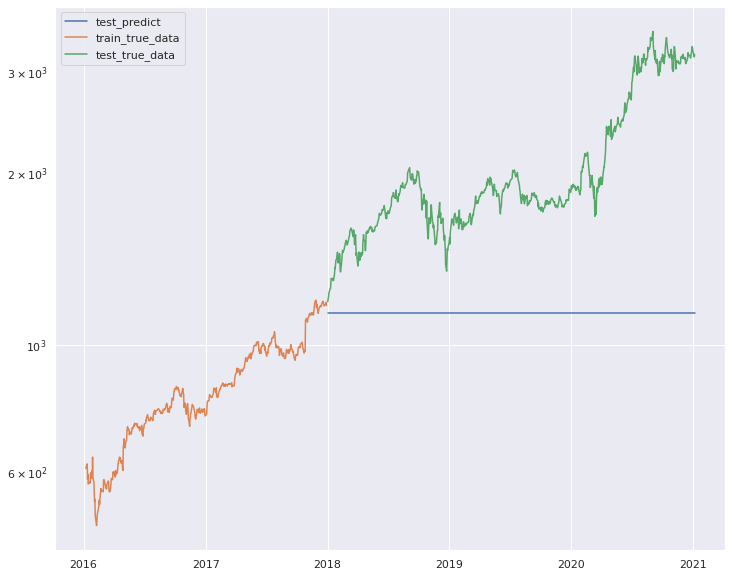

In [360]:
plt.figure(figsize=(12, 10))
# sam dodałem labele i legendę. 
# Czemu wykres dla test_predict jest poziomy?
plt.plot(df_test['Date'], forest.predict(df_test['Date'].values.reshape(-1, 1)), label="test_predict")
plt.plot(df_train['Date'], close, label="train_true_data")
plt.plot(df_test['Date'], df_test['Close'], label="test_true_data")
plt.yscale('log')
plt.legend()

In [361]:
# sam sprawdziłem score. Jest ujemny bo źle prognozuje
forest.score(df_test['Date'].values.reshape(-1, 1), df_test["Close"])

-2.493310076666494

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Najlepsze parametry wybrane z param_grid {'min_samples_leaf': 5, 'n_estimators': 2}
Wynik -2.256344119245335


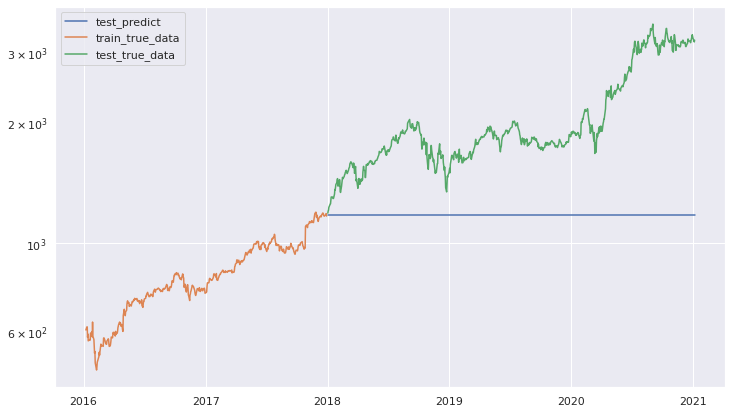

In [362]:
# sam robię grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = [{'n_estimators': range(1, 31),
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 10, 15, 30]}]

reg = RandomForestRegressor()

# metryka r kwadrat odejmuje prawdziwą wartość od przewidzianej,
# potem podnosi do kwadratu i uśrednia (ona jest wariantem MSE)
gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', n_jobs=-1)
gs.fit(df_train['Date'].values.reshape(-1, 1), close)

model = gs.best_estimator_
print(model)
print("Najlepsze parametry wybrane z param_grid", gs.best_params_)
print("Wynik", gs.score(df_test['Date'].values.reshape(-1, 1), df_test["Close"]))

plt.figure(figsize=(12, 7))
# sam dodałem labele i legendę. 
# Czemu nadal wykres dla test_predict jest poziomy (trochę wyżej niż poprzedni)?
plt.plot(df_test['Date'], model.predict(df_test['Date'].values.reshape(-1, 1)), label="test_predict")
plt.plot(df_train['Date'], close, label="train_true_data")
plt.plot(df_test['Date'], df_test['Close'], label="test_true_data")
plt.yscale('log')
plt.legend()

In [363]:
# to nie działa bo wyskakuje
# AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# import pydotplus

# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,
#                filled=True, rounded=True,
#                special_characters=True,
#                feature_names=['first'],
#                class_names=[1, 0])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('graph.png')
# Image(graph.create_png())